In [53]:
import torch
import torchvision
import matplotlib.pyplot as plt

mnist_train = torchvision.datasets.MNIST('../data', train=True, download=True)
train_x = mnist_train.data.reshape(-1, 784).float() 
train_y = torch.zeros((mnist_train.targets.shape[0], 10)) 
train_y[torch.arange(mnist_train.targets.shape[0]), mnist_train.targets] = 1 

mnist_test = torchvision.datasets.MNIST('../data', train=False, download=True)
test_x = mnist_test.data.reshape(-1, 784).float() 
test_y = torch.zeros((mnist_test.targets.shape[0], 10)) 
test_y[torch.arange(mnist_test.targets.shape[0]), mnist_test.targets] = 1


In [54]:
class SoftmaxModel:
    def __init__(self):
        self.W = torch.ones([784,10], requires_grad=True)
        self.b = torch.ones([1,10], requires_grad=True)
    # Predictor
    def f(self, x):
        return torch.nn.functional.softmax(self.logits(x), dim=1)
    
    def logits(self, x):
        return x @ self.W + self.b
    
    def accuracy(self, x, y):
        return torch.mean(torch.eq(self.f(x).argmax(1),
        y.argmax(1)).float())

    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.f(x),y)

In [55]:
model = SoftmaxModel()

optimizer = torch.optim.SGD([model.W, model.b], lr=1)
for epoch in range(1000):
    model.loss(train_x, train_y).backward()  
    optimizer.step() 
    optimizer.zero_grad()  
    if epoch % 100 == 0:
        print("epoch %s, loss %s acc %s " %(epoch, model.loss(train_x, train_y).item(), model.accuracy(test_x, test_y).item()*100))
print("W = %s, b = %s, loss = %s acc = %s" %(model.W, model.b, model.loss(train_x, train_y), model.accuracy(test_x, test_y)))

epoch 1, loss 0.6879503130912781 acc 68.0400013923645 
epoch 101, loss 0.6731604933738708 acc 82.20000267028809 
epoch 201, loss 0.6655755043029785 acc 89.80000019073486 
epoch 301, loss 0.6645891070365906 acc 90.53000211715698 


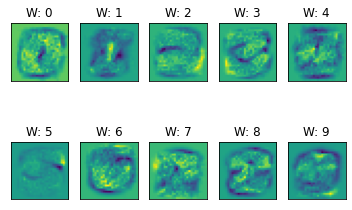

In [ ]:
fig = plt.figure('Photos')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(model.W[:, i].detach().numpy().reshape(28, 28))
    plt.title(f'W: {i}')
    plt.xticks([])
    plt.yticks([])

plt.show()